### ANALISIS DE DATASETS DE VIDEOJUEGOS POPULARES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Inicializando el dataframe

In [3]:
datos=pd.read_csv("assets/data/games.csv", index_col="Id")
datos.head() #muestra las primeras 5 lineas del dataset
#datos.describe() #principales funciones estadisticas del dataset

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


### Dimension del dataset

In [4]:
print(f'Cantidad de Filas y Columnas: {datos.shape}')

Cantidad de Filas y Columnas: (1512, 13)


### Mostrar informacion del dataset

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB


### Mostrando las filas de datos nulos

In [6]:
datos.isnull()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,False,False,False,False,False,False,False,False,False,False,False,False,False
1508,False,False,False,False,False,False,False,False,False,False,False,False,False
1509,False,False,False,False,False,False,False,False,False,False,False,False,False


### Identificando columnas con datos nulos

In [7]:
datos.isnull().any()

Title                False
Release Date         False
Team                  True
Rating                True
Times Listed         False
Number of Reviews    False
Genres               False
Summary               True
Reviews              False
Plays                False
Playing              False
Backlogs             False
Wishlist             False
dtype: bool

### Eliminando datos nulos del dataset

In [8]:
data_sin_nulos = datos.dropna()
data_sin_nulos

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206


### Verificar si el genero RPG esta presente en la lista

In [9]:
def filtro_rpg(genres):
    return 'RPG' in genres

#Aplica el filtro utilizando apply
datosRPG = data_sin_nulos[data_sin_nulos['Genres'].apply(filtro_rpg)]

#Muestra el dataset solamente incluyendo la columnas Titulo y Ranking
nombresRPG = datosRPG[['Title', 'Rating']]
nombresRPG.head(20)

#Hay un error en el codigo, y que no llamamos al data_sin_nulos, y eso es un error

,Title,Rating
Id,,
0,Elden Ring,4.5
1,Hades,4.3
2,The Legend of Zelda: Breath of the Wild,4.4
3,Undertale,4.2
6,Omori,4.2
9,NieR: Automata,4.3
10,Persona 5 Royal,4.4
12,God of War,4.2
14,Bloodborne,4.5


### Informacion del dataset filtrado

In [10]:
nombresRPG.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   516 non-null    object 
 1   Rating  516 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.1+ KB


### Identificando si existen datos nulos en el nuevo dataset

In [11]:
nombresRPG.isnull()

,Title,Rating
Id,,
0,False,False
1,False,False
2,False,False
3,False,False
6,False,False
...,...,...
1487,False,False
1489,False,False
1500,False,False


### Mostrando los primeros 10 videojuegos RPG y su rating de popularidad

<Axes: xlabel='Id'>

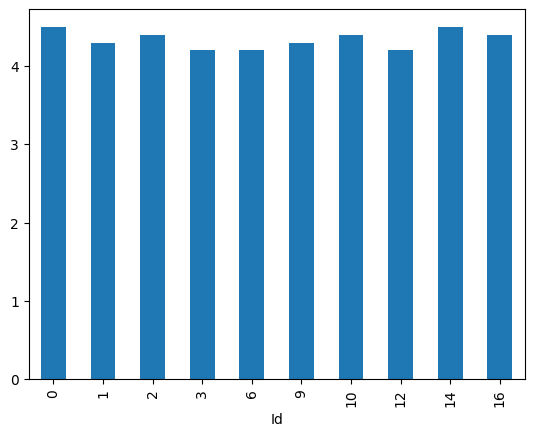

In [12]:
datasetRPG = nombresRPG.head(10)
datasetRPG.drop(['Title'],axis=1)['Rating'].plot(kind='bar')

#El grafico no es el optimo

### MOSTRANDO LOS PRIMEROS 20 VIDEOJUEGOS RATING CON SU TITULO CORRESPONDIENTE

<Axes: xlabel='Title'>

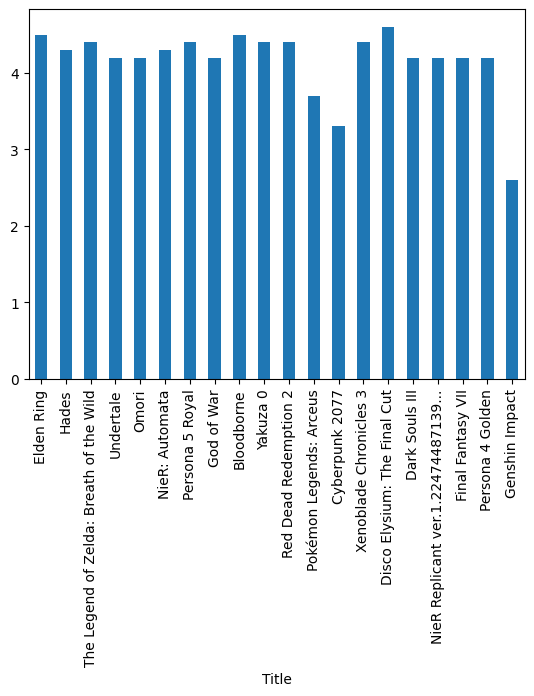

In [13]:
datasetRPG = nombresRPG.head(20)
datasetRPG.set_index('Title', inplace=True)  # Establecer la columna 'Title' como índice
datasetRPG['Rating'].plot(x=None, kind='bar')  # Utilizar el índice en el eje x

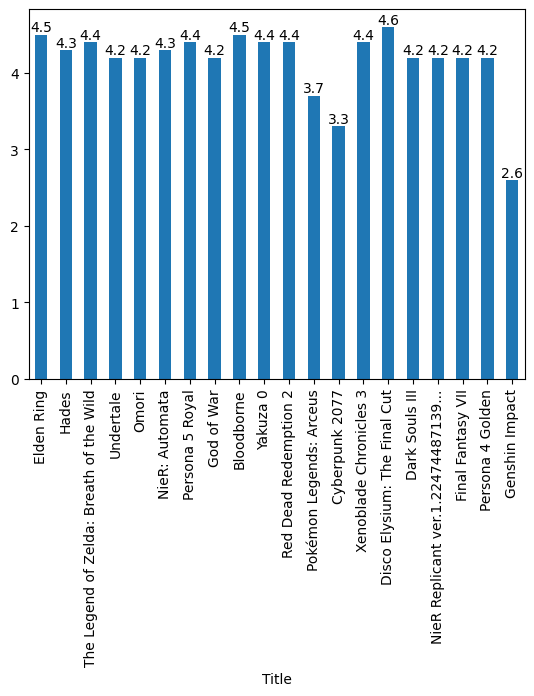

In [14]:
datasetRPG = nombresRPG.head(20)
datasetRPG.set_index('Title', inplace=True)

ax = datasetRPG['Rating'].plot(x=None, kind='bar')

#Agregando etiquetas de rating en las barras
for i, rating in enumerate(datasetRPG['Rating']):
    ax.annotate(str(rating), xy=(i, rating), ha='center', va='bottom')

plt.show()

### PROMEDIO RATING VIDEOJUEGOS RPG

In [15]:
#La función lambda se aplica a cada elemento de la columna Genres
#Esta un función comprueba si la cadena "RPG" está presente en el valor de cada fila (Resultado serie de booleanos)

ratings_RPG = data_sin_nulos[data_sin_nulos['Genres'].apply(lambda x: 'RPG' in x)]['Rating']
promedio_RPG = ratings_RPG.mean()

promedio_RPG

3.8325581395348833

#### PROMEDIO RATING VIDEOJUEGOS INDIE

In [16]:
ratings_Indie = data_sin_nulos[data_sin_nulos['Genres'].apply(lambda x: 'Indie' in x)]['Rating']
promedio_Indie = ratings_Indie.mean()

promedio_Indie

3.7031802120141344

### Promedio rating aventura

In [17]:
ratings_Adventure = data_sin_nulos[data_sin_nulos['Genres'].apply(lambda x: 'Adventure' in x)]['Rating']
promedio_Adventure = ratings_Adventure.mean()

promedio_Adventure

3.776266137040715

### Promedio rating plataforma

In [18]:
ratings_Platform = data_sin_nulos[data_sin_nulos['Genres'].apply(lambda x: 'Platform' in x)]['Rating']
promedio_Platform = ratings_Platform.mean()

promedio_Platform

3.6981762917933123

### CREACIÓN DE UN NUEVO DATAFRAME

In [19]:
#La función DataFrame crea un nuevo DataFrame vacío o a partir de datos existentes
#Recibe un diccionario, especificando las etiquetas de las columnas (claves) y sus valores respectivos
dataset_promedios = pd.DataFrame({'Género': ['RPG', 'Indie', 'Adventure', 'Platform'], 'Promedio': [promedio_RPG, promedio_Indie,promedio_Adventure,promedio_Platform]})

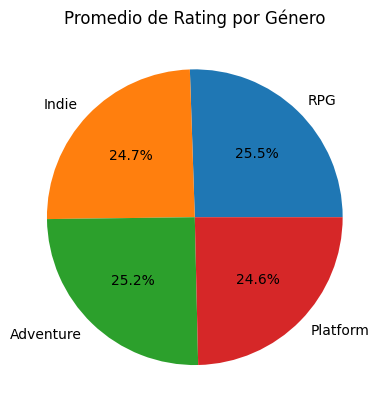

In [20]:
#plt.pie crea gráficos circulares
#autopct: es una cadena de formato que especifica cómo se mostrarán los porcentajes en el gráfico circular
plt.pie(dataset_promedios['Promedio'], labels=dataset_promedios['Género'], autopct='%1.1f%%')
plt.title('Promedio de Rating por Género')
plt.show()

In [21]:
data_sin_nulos.to_csv("assets/data/datasinnulos.csv")

### Tarea

In [22]:
#1 Agregar el genero plataforma y aventura al grafico circular
#2 Reemplazar los valores nulos por un valor por defecto en este caso cero
#3 Obtener los 10 videojuegos con el rating mas bajo y graficarlo
#4 Comparar en un mismo grafico en barras los 10 videojuegos peor ponderados con los mejores top 10 mejor ponderados